<a href="https://colab.research.google.com/github/nidhithakare1207/BML-Practicals/blob/main/Experiment_No_07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Experiment 7 : KNN Algorithm

Part 1

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving iris.csv to iris.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
df = pd.read_csv("iris.csv")

In [ ]:
print(df.head())
print("Shape:", df.shape)
print("Columns:", df.columns)

   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
Shape: (150, 5)
Columns: Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [ ]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred = knn.predict(X_test)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



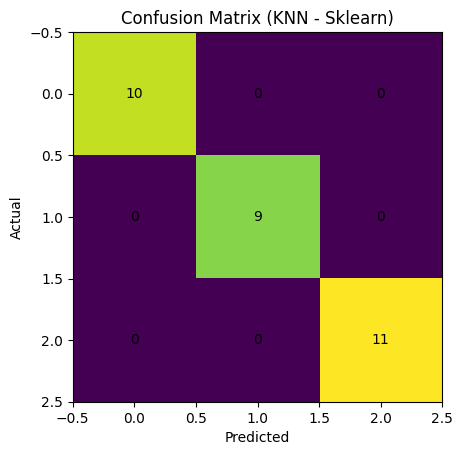

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm)
plt.title("Confusion Matrix (KNN - Sklearn)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center')

plt.show()

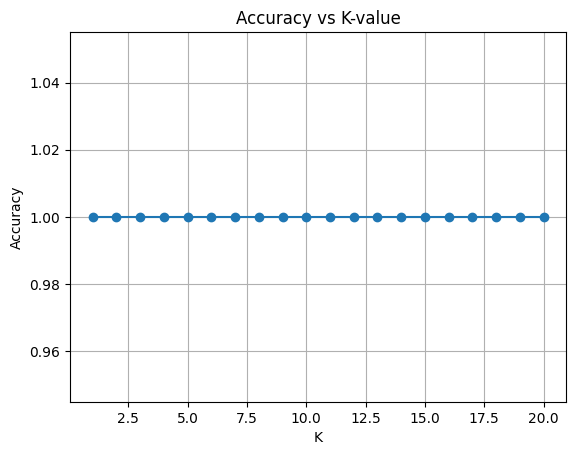

In [ ]:
accuracies = []
k_values = range(1, 21)

for k in k_values:
    knn_k = KNeighborsClassifier(n_neighbors=k)
    knn_k.fit(X_train, y_train)
    pred_k = knn_k.predict(X_test)
    accuracies.append(accuracy_score(y_test, pred_k))

plt.plot(k_values, accuracies, marker='o')
plt.title("Accuracy vs K-value")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

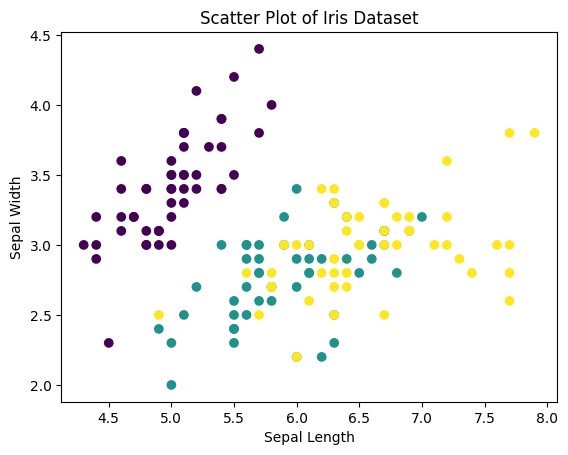

In [ ]:
plt.scatter(df["sepal_length"], df["sepal_width"], c=pd.Categorical(y).codes)
plt.title("Scatter Plot of Iris Dataset")
plt.xlabel("Sepal Length")
plt.ylabel("Sepal Width")
plt.show()

Part 2

In [ ]:
from collections import Counter

In [ ]:
df = pd.read_csv("iris.csv")

In [ ]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
def euclidean_distance(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

In [ ]:
def predict_one(row, k):
    distances = []
    for i in range(len(X_train)):
        dist = euclidean_distance(row, X_train[i])
        distances.append((dist, y_train[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest = [label for (_, label) in distances[:k]]
    return Counter(k_nearest).most_common(1)[0][0]

In [ ]:
def predict_manual(X_test, k=3):
    return [predict_one(row, k) for row in X_test]

y_pred_manual = predict_manual(X_test, k=3)

manual_accuracy = np.mean(y_pred_manual == y_test)
print("Manual KNN Accuracy:", manual_accuracy)

Manual KNN Accuracy: 1.0


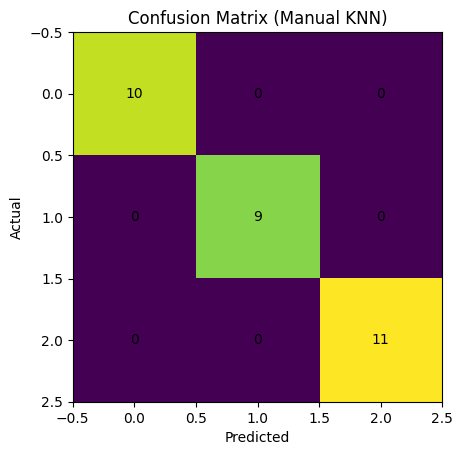

In [ ]:
cm_manual = confusion_matrix(y_test, y_pred_manual)
plt.imshow(cm_manual)
plt.title("Confusion Matrix (Manual KNN)")
plt.xlabel("Predicted")
plt.ylabel("Actual")

for i in range(cm_manual.shape[0]):
    for j in range(cm_manual.shape[1]):
        plt.text(j, i, cm_manual[i, j], ha='center', va='center')

plt.show()

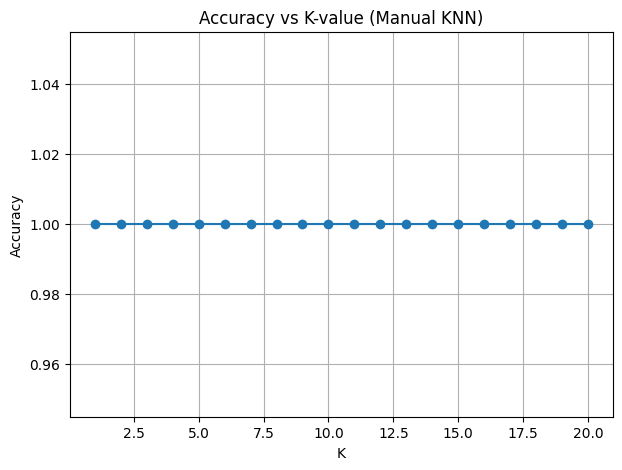

In [ ]:
accuracies_manual = []
k_values = range(1, 21)

for k in k_values:
    y_pred_k = predict_manual(X_test, k)
    acc = np.mean(y_pred_k == y_test)
    accuracies_manual.append(acc)

plt.figure(figsize=(7,5))
plt.plot(k_values, accuracies_manual, marker='o')
plt.title("Accuracy vs K-value (Manual KNN)")
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()
